In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImpute
from sklearn.metrics import accuracy_score

In [15]:

car_data_path = 'Car.csv'
car_df = pd.read_csv(car_data_path)

car_df_info = car_df.info()
car_df_head = car_df.head()

car_df_head, car_df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price_in_thousands  155 non-null    float64
 1   Engine_size         156 non-null    float64
 2   Horsepower          156 non-null    float64
 3   Fuel_efficiency     154 non-null    float64
 4   sales               157 non-null    float64
dtypes: float64(5)
memory usage: 6.3 KB


(   Price_in_thousands  Engine_size  Horsepower  Fuel_efficiency   sales
 0               21.50          1.8       140.0             28.0  16.919
 1               28.40          3.2       225.0             25.0  39.384
 2                 NaN          3.2       225.0             26.0  14.114
 3               42.00          3.5       210.0             22.0   8.588
 4               23.99          1.8       150.0             27.0  20.397,
 None)

In [16]:
imputer = SimpleImputer(strategy='mean')
car_df_imputed = pd.DataFrame(imputer.fit_transform(car_df), columns=car_df.columns)

fuel_efficiency_threshold = car_df_imputed['Fuel_efficiency'].median()
car_df_imputed['Fuel_efficiency_category'] = (car_df_imputed['Fuel_efficiency'] >= fuel_efficiency_threshold).astype(int)

car_df_imputed.drop('Fuel_efficiency', axis=1, inplace=True)

X = car_df_imputed.drop('Fuel_efficiency_category', axis=1)
y = car_df_imputed['Fuel_efficiency_category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], y_train.head()


(array([[-1.02479368, -1.19467637, -1.12616033,  1.58045528],
        [-1.11023259, -0.5076787 , -1.14454014,  2.94486697],
        [ 1.2623526 , -0.31139365,  0.65668148, -0.75227563],
        [ 0.48524616,  0.47374655,  0.34422467, -0.71114154],
        [ 0.28271234,  0.2774615 , -0.20716971, -0.16553406]]),
 136    1
 55     0
 124    0
 84     0
 105    0
 Name: Fuel_efficiency_category, dtype: int64)

In [17]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)
        

Accuracy of the model: 0.78125


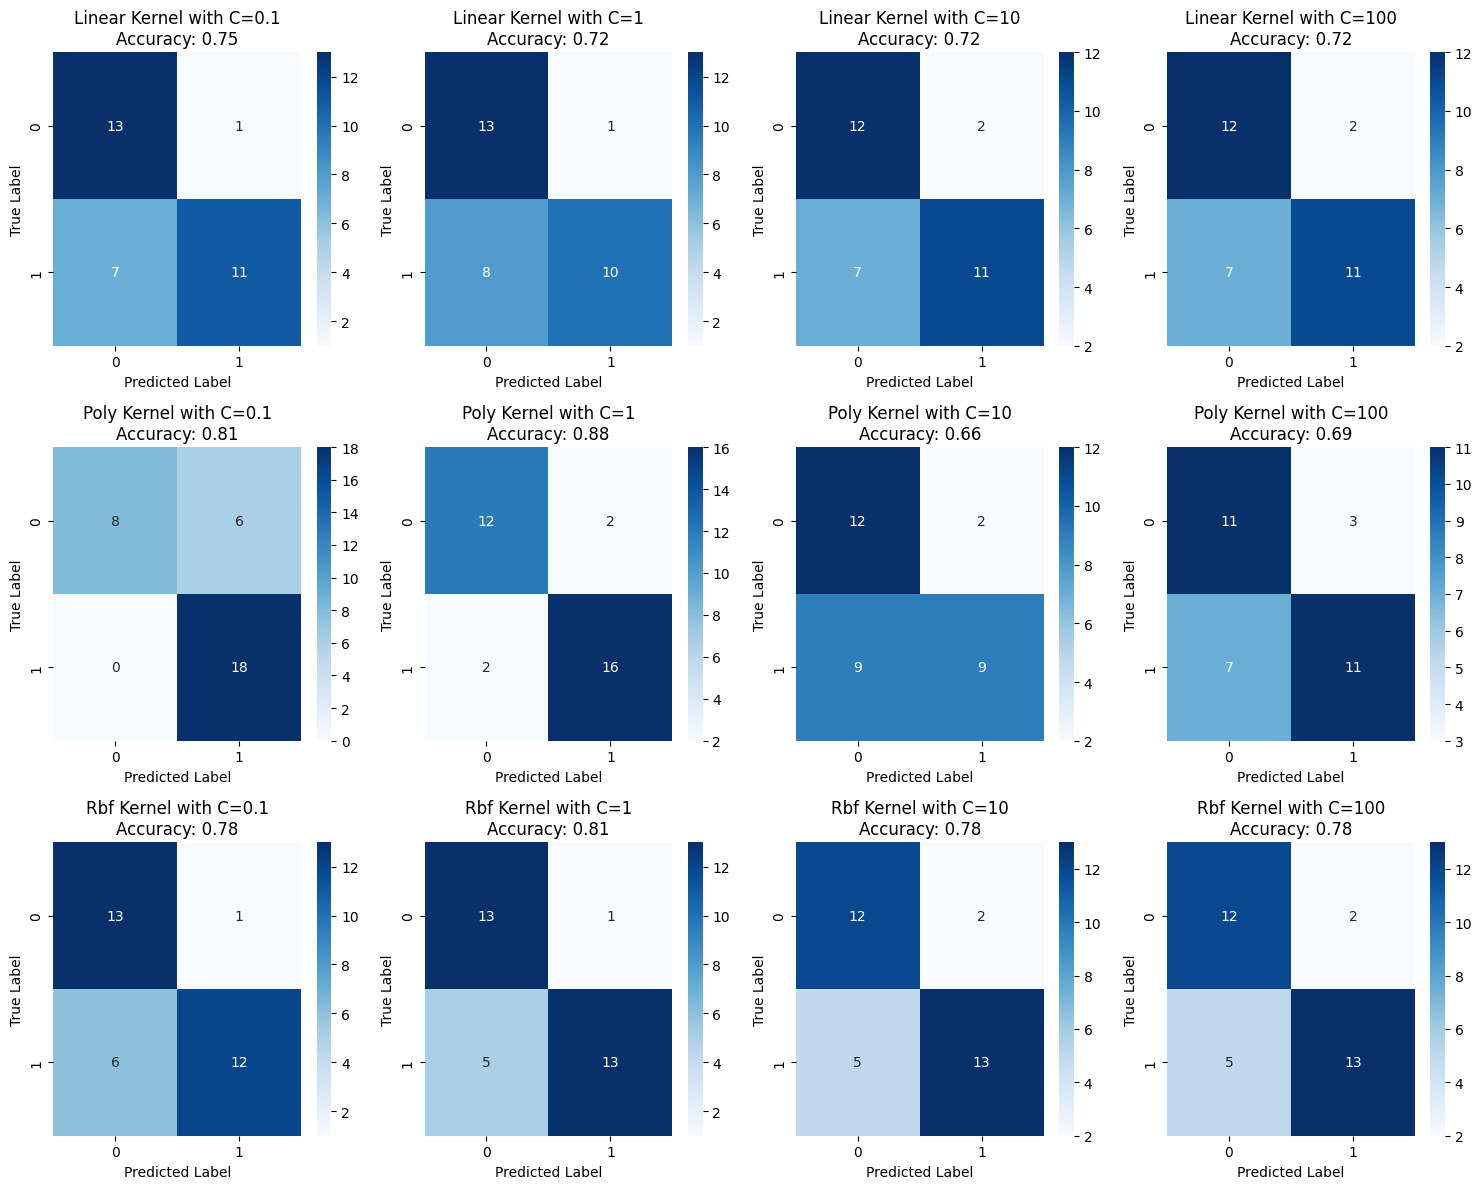

In [18]:
kernels = ['linear', 'poly', 'rbf']
costs = [0.1, 1, 10, 100]

results = {}


for kernel in kernels:
    results[kernel] = {}
    for cost in costs:
        svm_model = SVC(kernel=kernel, C=cost, degree=3 if kernel == 'poly' else 0, gamma='scale' if kernel == 'rbf' else 'auto')
        svm_model.fit(X_train_scaled, y_train)
        y_pred = svm_model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
      
        results[kernel][cost] = {'accuracy': accuracy, 'confusion_matrix': conf_matrix}

fig, axes = plt.subplots(len(kernels), len(costs), figsize=(15, 12))

for i, kernel in enumerate(kernels):
    for j, cost in enumerate(costs):
        sns.heatmap(results[kernel][cost]['confusion_matrix'], annot=True, fmt="d", ax=axes[i, j], cmap='Blues')
        axes[i, j].set_title(f'{kernel.capitalize()} Kernel with C={cost}\nAccuracy: {results[kernel][cost]["accuracy"]:.2f}')
        axes[i, j].set_xlabel('Predicted Label')
        axes[i, j].set_ylabel('True Label')

plt.tight_layout()
plt.show()
